In [73]:
import numpy as np
import cv2
import math as m
from matplotlib import pyplot as plt

In [74]:
gray = cv2.imread('city.jpg',0)

In [75]:
def zero_pad (image, height, width):
    paddedImage = np.pad(image,((0, height),(0,width)), 'constant', constant_values = (0,0))
    return paddedImage

In [76]:
def center_matrix(height,width):
    res = np.empty([height, width])
    for row in range (height):
        for column in range (width):
            res[row, column] = (-1)**(row+column)
    return res            

In [77]:
def normalize(image):
    height, width = image.shape
    minimum = np.amin(image)
    maximum = np.amax(image)
    normalized = np.empty([height, width])
    for row in range (height):
        for column in range (width):
            normalized[row, column] = (image[row, column]-minimum)/(maximum-minimum)
    return normalized

In [78]:
height, width = gray.shape
gray_padded = zero_pad(gray, height, width)
normalized = normalize(gray_padded)
height_padded, width_padded = gray_padded.shape
cmatrix = center_matrix(height_padded, width_padded)
centered_image = np.multiply(normalized,cmatrix)

In [79]:
# f_transform = np.fft.fft2(centered_image)
# fshift = np.fft.fftshift(f_transform)
# magnitude_spectrum = 20*np.log(np.abs(fshift))
f = np.fft.fft2(centered_image)
magnitude_spectrum = 20*np.log(np.abs(f))
print (centered_image.shape)
print (f.shape)

(3020, 2000)
(3020, 2000)


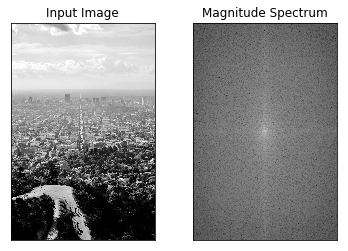

In [80]:
plt.subplot(121),plt.imshow(gray, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

In [9]:
def laplacian(distance_matrix):
    windowH, windowW = np.shape(distance_matrix)              
    window = np.empty([windowH, windowW])
    for h in range(windowH):                             
            for w in range(windowW):                  
                window[h,w] = -4*(m.pi**2)*distance_matrix[h,w]
    return window

In [10]:
def gaussianfilter(distance_matrix, sigma): 
    windowH, windowW = np.shape(distance_matrix)              
    window = np.empty([windowH, windowW])
    for h in range(windowH):                             
            for w in range(windowW):                  
                window[h,w] = m.exp(-((distance_matrix[h,w]**2)/(2*sigma**2)))
    return window

In [11]:
def distance(height,width):
    distance_matrix = np.empty([height, width])
    for row in range (height):
        for column in range (width):
            distance_matrix[row,column] = m.sqrt((row-height/2)**2+(column-width/2)**2)
    return distance_matrix

In [81]:
fheight, fwidth = f.shape
d = distance(fheight, fwidth)
gWindow = gaussianfilter(d, 64)
lWindow = laplacian(d)

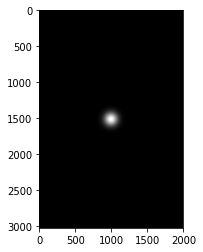

(3020, 2000)
(3020, 2000)
(3020, 2000)


In [82]:
plt.subplot(121),plt.imshow(gWindow, cmap = 'gray')
plt.show()
print (d.shape)
print (gWindow.shape)
print (lWindow.shape)

In [14]:
def get_unpad(img):
    H, W = np.shape(img)           
    unpadH, unpadW = int(H/2), int(W/2)
    unpad = np.empty([unpadH, unpadW])
    for h in range(unpadH):                             
            for w in range(unpadW):                  
                unpad[h,w] = img[h,w]
    return unpad

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:7: ComplexWarning: Casting complex values to real discards the imaginary part
  import sys


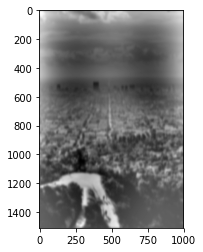

In [101]:
filtered_image = np.multiply(f,gWindow)
filtered_image = np.multiply(filtered_image, lWindow)
#filtered_image = np.multiply(f,gWindow)
filtered_magnitude_spectrum = magnitude_spectrum*gWindow
plt.imshow(filtered_magnitude_spectrum, cmap = 'gray')
img_back = np.fft.ifft2(filtered_image)
img_uncentered = np.multiply(img_back, cmatrix)
img_unpadded = get_unpad(img_uncentered)
plt.imshow(img_unpadded, cmap = 'gray')
# img_unpadded = np.around(img_unpadded)
# img_unpadded = img_unpadded.astype(np.uint8)
# numpy_horizontal = np.hstack((gray, img_unpadded))
# cv2.imshow('original vs blurred image', numpy_horizontal)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

In [103]:
img_normalized_unpadded = normalize(img_unpadded)
img_normalized_unpadded = img_normalized_unpadded * 2
img_normalized_unpadded = img_normalized_unpadded - 1
c = -30
img_sharpened = gray + c*img_normalized_unpadded
#img_sharpened = np.around(img_sharpened)
#img_sharpened = img_sharpened.astype(np.uint8)
img_sharpened = normalize(img_sharpened)*256
img_sharpened = np.around(img_sharpened)
img_sharpened = img_sharpened.astype(np.uint8)
numpy_horizontal = np.hstack((gray, img_sharpened))
cv2.imshow('original vs sharpened image', numpy_horizontal)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
centered_image = normalize(centered_image)*256
centered_image = np.around(centered_image)
centered_image = centered_image.astype(np.uint8)
cv2.imshow(' ', centered_image)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [110]:
cv2.imwrite('city_centered_image.jpg', centered_image)

True